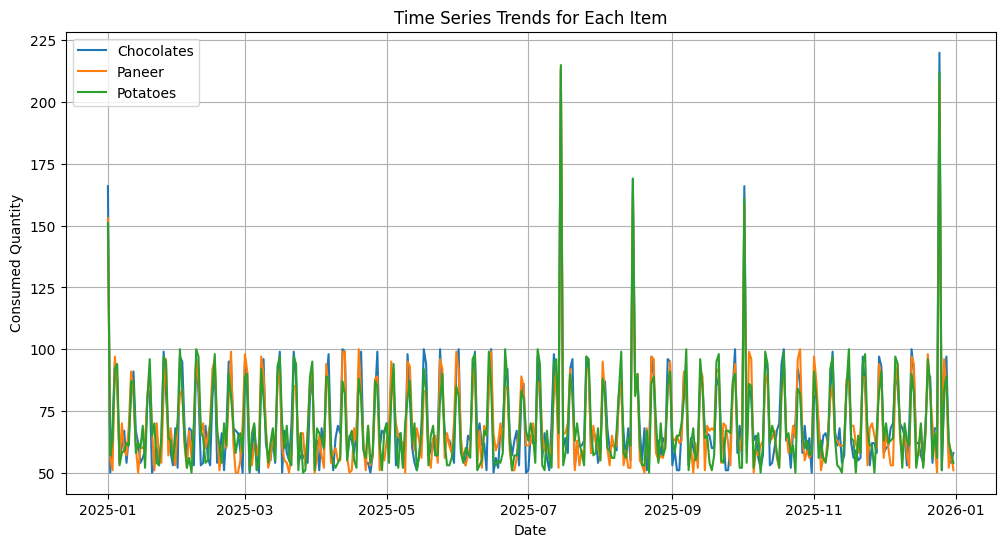

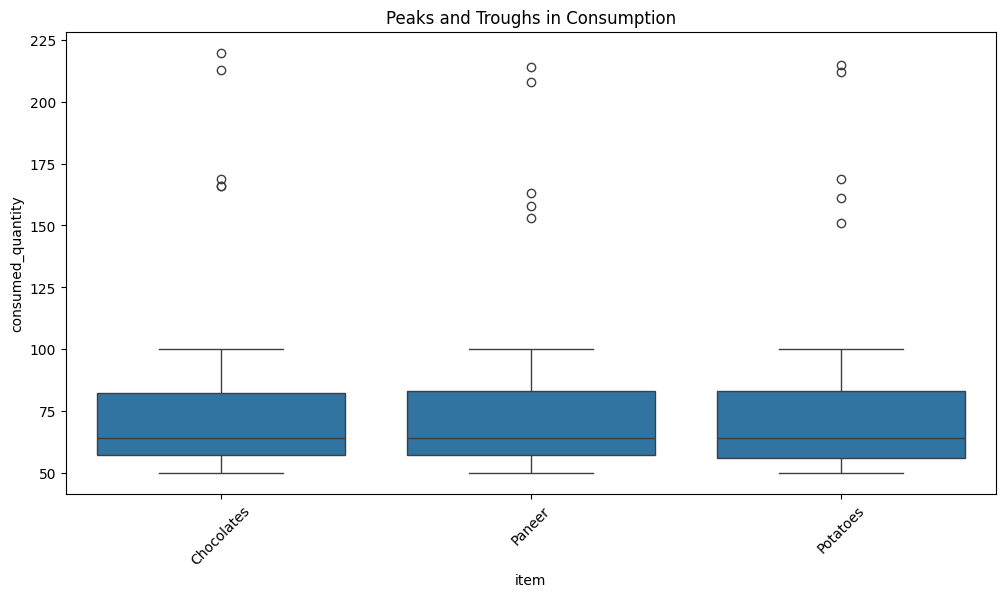

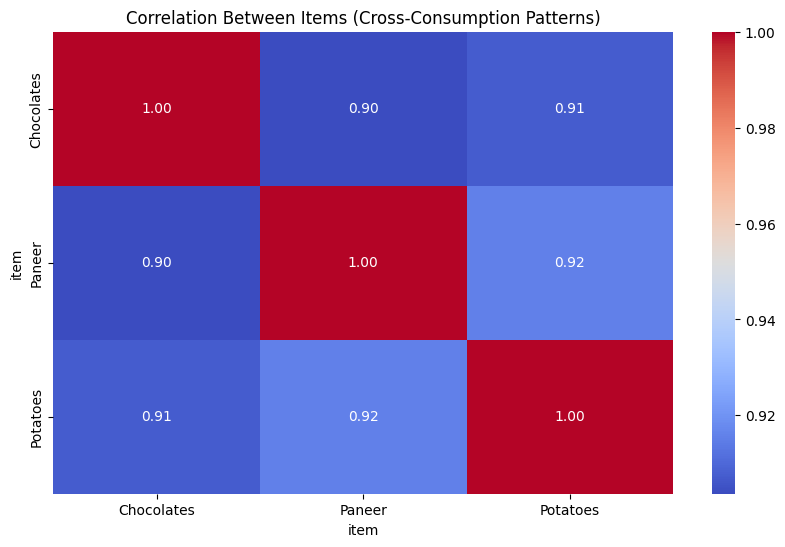

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load dataset
file_path = "consumption_data_2025.xlsx"
df = pd.read_excel(file_path)

# Convert date column to datetime format
df['consumption_date'] = pd.to_datetime(df['consumption_date'])

# Aggregate consumption per item per day
df_grouped = df.groupby(['consumption_date', 'item'])['consumed_quantity'].sum().reset_index()

# Get unique items for visualization
unique_items = df_grouped['item'].unique()

# Plot time series trends for each item
plt.figure(figsize=(12, 6))
for item in unique_items:
    item_data = df_grouped[df_grouped['item'] == item]
    plt.plot(item_data['consumption_date'], item_data['consumed_quantity'], label=item)
plt.xlabel('Date')
plt.ylabel('Consumed Quantity')
plt.title('Time Series Trends for Each Item')
plt.legend()
plt.grid()
plt.show()

# Identify peaks and troughs using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='item', y='consumed_quantity', data=df_grouped)
plt.xticks(rotation=45)
plt.title('Peaks and Troughs in Consumption')
plt.show()

# Compute correlation between items (cross-consumption patterns)
item_pivot = df_grouped.pivot(index='consumption_date', columns='item', values='consumed_quantity').fillna(0)
correlation_matrix = item_pivot.corr()

# Plot heatmap for correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Items (Cross-Consumption Patterns)')
plt.show()

# Interactive visualization using Plotly
fig = px.line(df_grouped, x='consumption_date', y='consumed_quantity', color='item', 
              title='Interactive Time Series Trends')
fig.show()
